### 면적 그래프

- 면적 그래프는 각 열의 데이터를 선 그래프로 구현하는데, 선 그래프와 x 축 사이의 공간이 색이 입혀진다.
- 기본적으로 색의 투명도는 기본값 0.5로 투과 된다.(범위: 0-1) alpha=0.xx 옵션을 줄 수 있음.
- 선 그래프를 그리는 plot() 메소드에 kind='area' 옵션을 추가하면 간단하게 그릴 수 있다.
- 그래프를 다른 열의 선 그래프 위로 쌓아 올리는 방식을 표현하려면 stacked=True 옵션을 추가하면된다.(stacked=False 옵션을 지정하면 각 열의 선 그래프들이 누적되지 않고 서로 겹치지도록 표시됨.)
- 각 열의 패턴과 함께 열 전체의 합계가 어떻게 변하는지 파악가능하다.

In [1]:
import warnings
warnings.filterwarnings('ignore') # 각종 warning 무시하기

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 전역 폰트 적용하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')


In [2]:
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
# 전출지별 누락값을 앞 데이터로 채움(엑셀 양식 병합 부분)
df= df.fillna(method='ffill')

In [12]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True) # 행 인덱스 지정!!!

In [13]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도' 로 이동한 인구 데이터 값만 선택 연도는 1970~2017 
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

In [14]:
# 스타일 서식 지정
plt.style.use('fast')

In [15]:
# 데이터 프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시 하기 위함)
df_4.index = df_4.index.map(int)

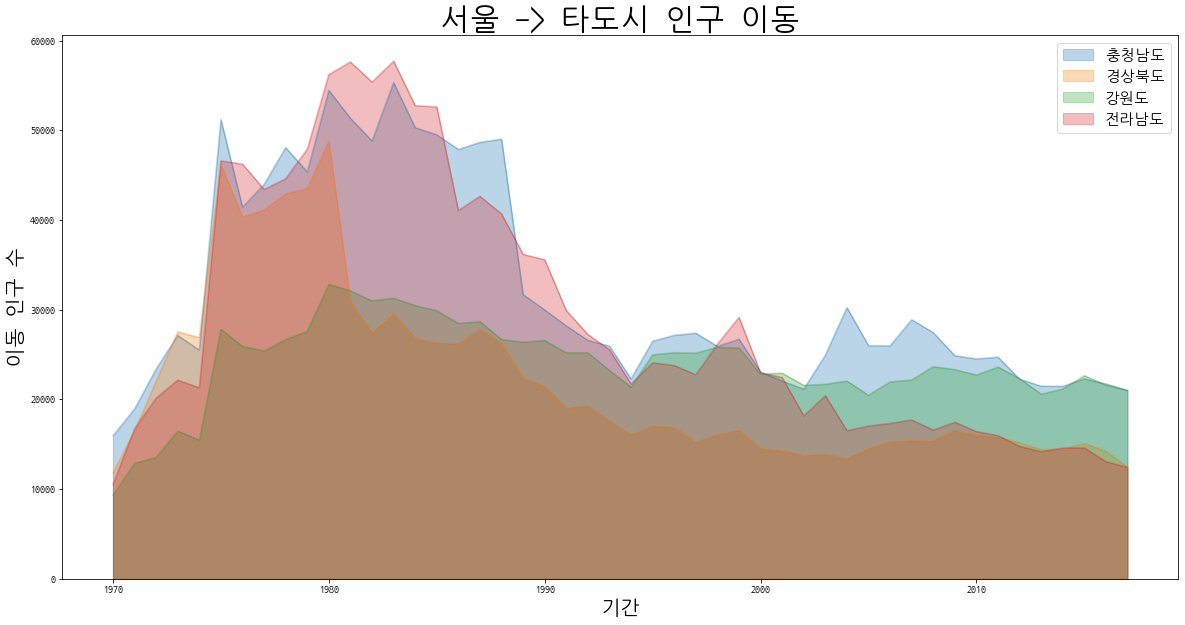

In [16]:
# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.3, figsize=(20,10))

plt.title('서울 -> 타도시 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

이번에는 stacked = True 옵션을 활용해서 다시 그려보자

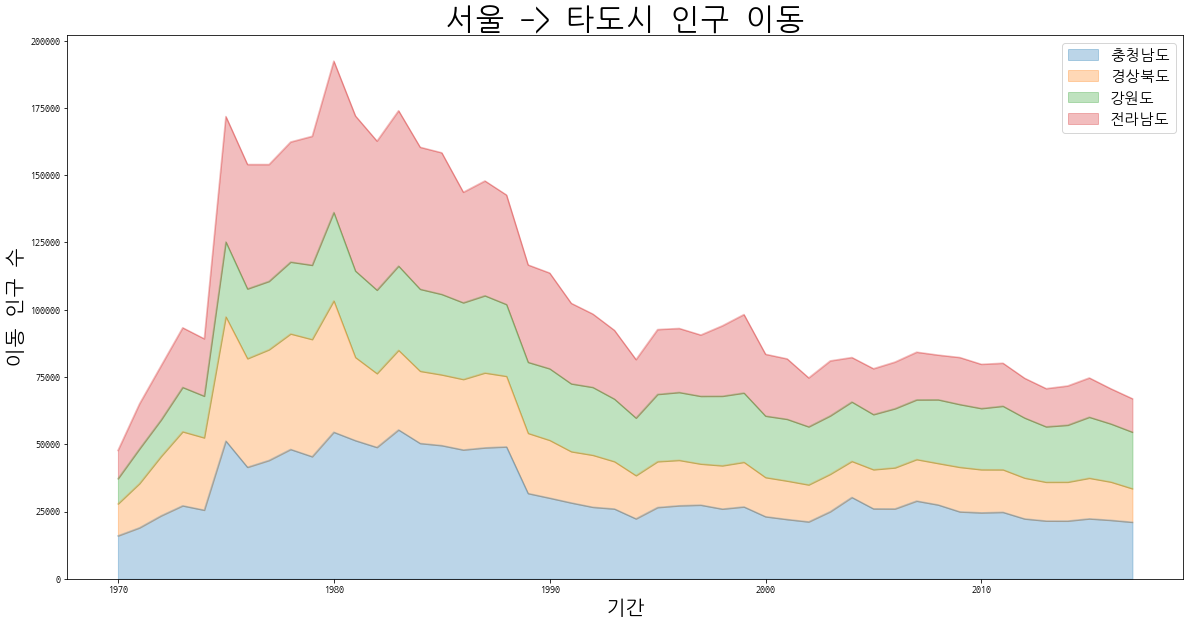

In [17]:
# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.3, figsize=(20,10))

plt.title('서울 -> 타도시 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

앞서 df_4.plot 은 axe 객체를 생성 한것이다 axe 객체의 메소드를 이용해서 그래프를 그려보자.

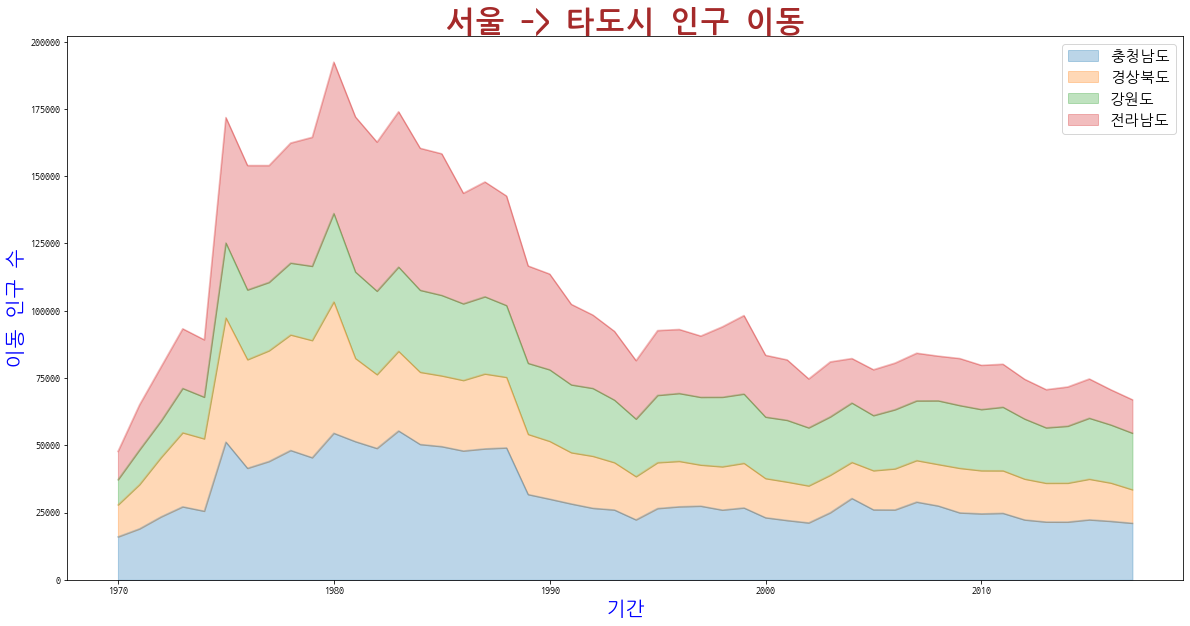

In [19]:
# 면적 그래프 그리기
axe = df_4.plot(kind='area', stacked=True, alpha=0.3, figsize=(20,10))

axe.set_title('서울 -> 타도시 인구 이동', size=30, color='brown', weight='bold')
axe.set_ylabel('이동 인구 수', size=20, color='blue')
axe.set_xlabel('기간', size=20, color='blue')
axe.legend(loc='best', fontsize=15)

plt.show()

### 막대 그래프

- 막대 그래프는 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현한다.
- 막대 높이의 상대적 길이 차이를 통해 값의 크고 작음을 설정
- 세로형, 가로형으로 표현이 가능하고 세로형인 경우 정보 제공 측면에서 선그래프와 큰 차이가 없다.
- 시간적으로 차이가 나는 두점에서 데이터 값의 차이를 잘 설명하므로 시계열 데이터를 표현하는데 적합하다.
- kind='bar'옵션으로 입력한다.

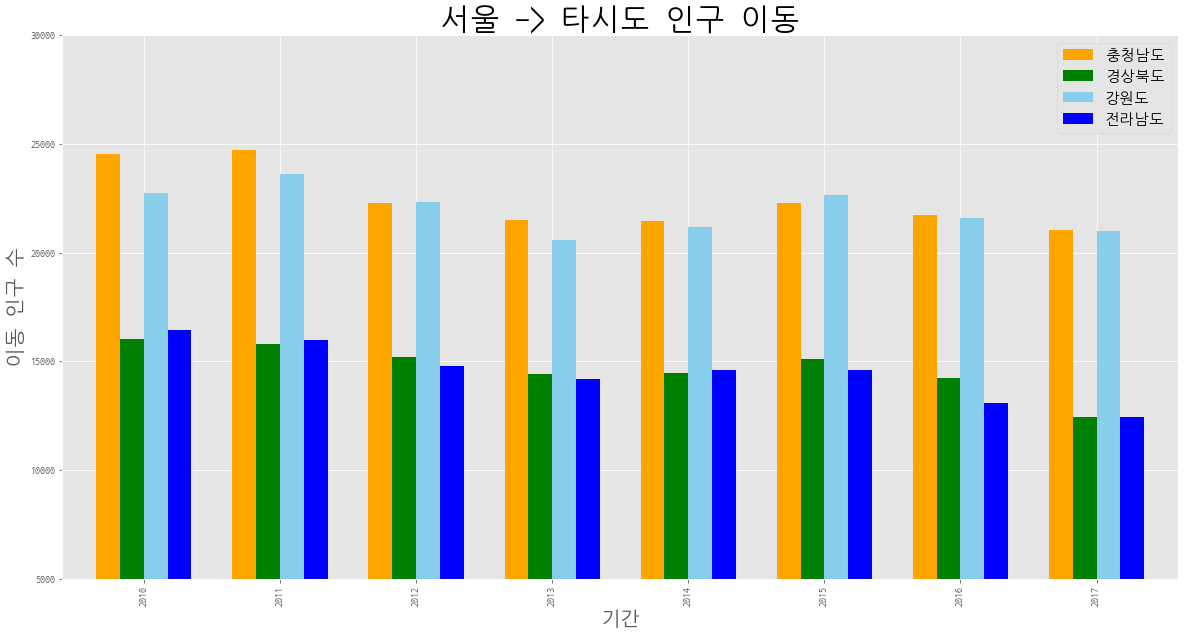

In [21]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))     
df_5 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_5 = df_5.transpose()

# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_5.index = df_5.index.map(int)

# 막대 그래프 그리기
df_5.plot(kind='bar', figsize=(20, 10), width=0.7,
          color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

가로형 막대 그래프로 표현해보자. 가로 막대 그래프는 각 변수 사이 값의 크기 차이를 설명하는데 적합하다.

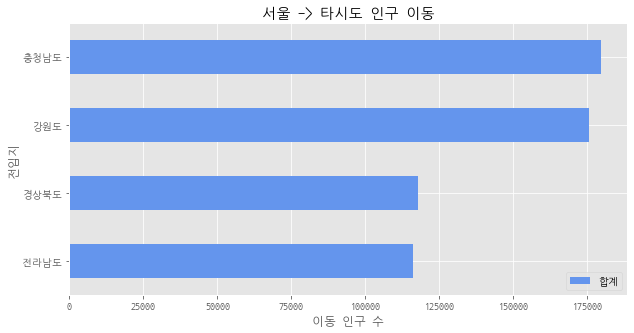

In [25]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))     
df_5 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years] # 이건 따로 형열 변환을 안함.

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_5['합계'] = df_5.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_5[['합계']].sort_values(by='합계', ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot') 

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

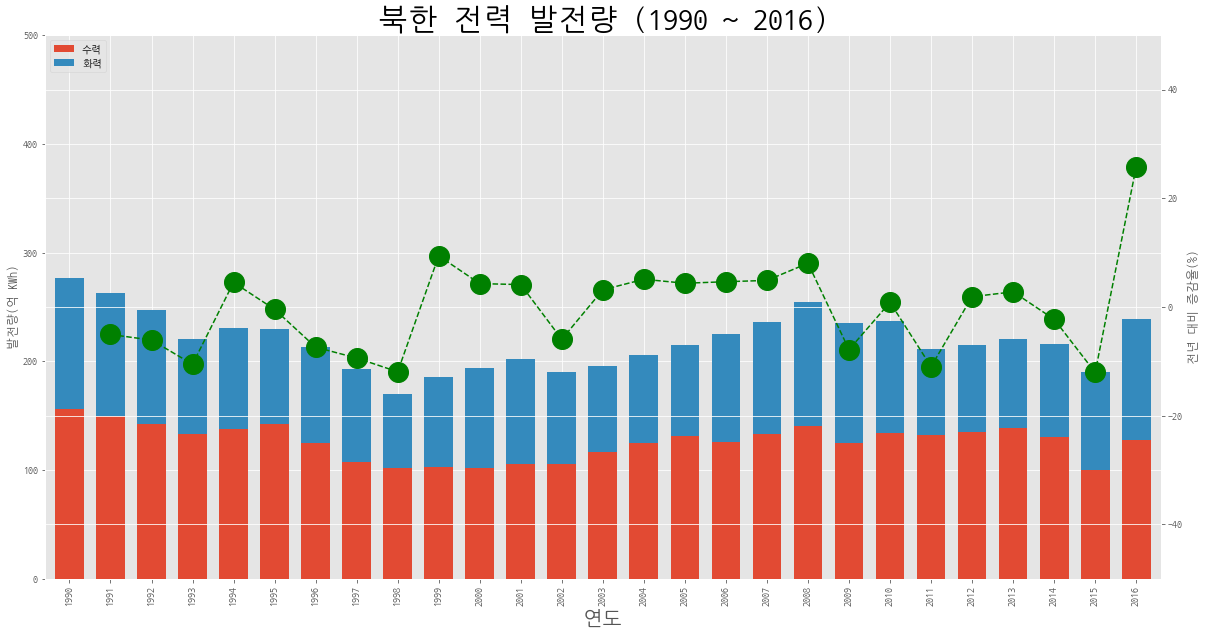

In [26]:
plt.style.use('ggplot')   # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T 

# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100      

# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, 
         color='green', label='전년대비 증감율(%)')  

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

위는 보조 축 활용하기의 예시이다. 왼쪽은 발전량을 표현하고, 오른쪽은 전년대비 증감율을 나타낸다. 과정은 이렇다.   
1. 증감률을 계산하기 위해 rename() 합계열이름을 총발전량으로 바꾸고 shift() 메소드로 총발전량의 열 데이터를 한 행씩 이동시켜 총발전량 - 1년열을 새로 생성.
2. 그리고 두열의 데이터를 이용하여 전년도 대비 변동율을 계산한 결과를 증감률 열에 저장한다.
3. ax1객체 막대 그래프에 stacked=True 옵션을 지정하여 수력, 화력 열의 값을 위아래로 쌓은 형태로 표현.
4. ax1 객체에 twinx() 메소드를 적용하여 ax1 쌍둥이 객체를 만들고, ax2변수에 저장한다. ax2 객체에 plot() 메소드를 활용하여 선그래프를 그린다. 그래프에 그릴 사용할 데이터는 앞서 만든 증감률 열을 활용한다. ls='--'옵션은 선스타일을 점선으로 표현하는 옵션

### 히스토그램

- 히스토그램은 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현한다.
- x축을 같은 크기의 여러 구간으로 나누고 각 구간에 속하는 데이터 값의 개수(빈도) y축에 표시한다.
- kind=hist 옵션을 넣는다. bins=n으로 구간을 n개로 나눌 수 있다.

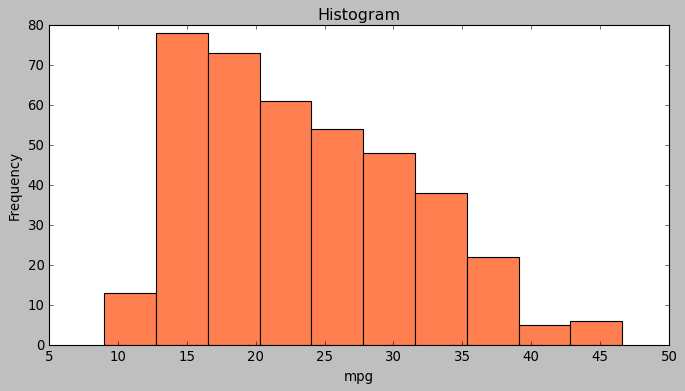

In [27]:
plt.style.use('classic')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv')

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

### 산점도 

- 산점도는 서로 다른 변수의 사이 관계를 나타내기 좋은 시각화 방법이다.
- 이때 각 변수는 연속되는 값을 갖는다.
- 일반적으로 정수형 또는 실수형의 값이다.
- (x, y) 좌표를 찾아서 점으로 표시한다.
- kind='scatter' 옵션으로 산점도를 그린다. x,y변수를 지정해줘야한다. c, s 옵션으로 점의 색상과 크기를 설정할 수 있다.)
- 선그래프에서 plot() 옵션에서 'o'옵션을 쓰면 사실 그것이 산점도다.

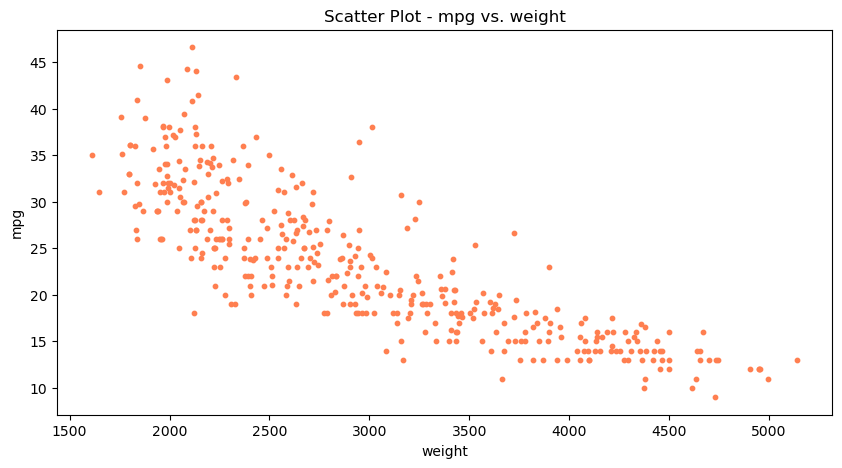

In [28]:
plt.style.use('default')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv')

# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

여기서 새로운 변수를 추가해서 점의 크기 또는 색상으로 표현할 수 있다. 열의 최대값 대비 상대적 크기를 나타내는 비율을 계산하여 cylinders_size 변수에 저장한다.(여기서 cylinders_size는 0-1 범위의 실수 값의 배열(시리즈)이다. **버블차트이다**

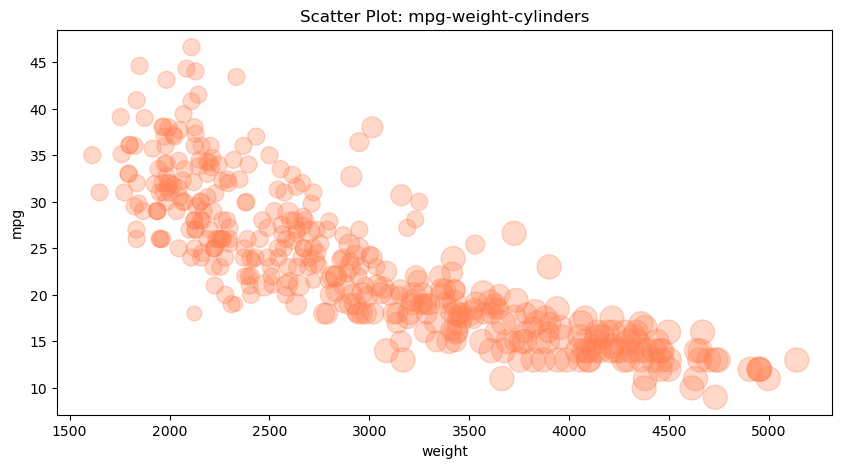

In [39]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5),
        s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

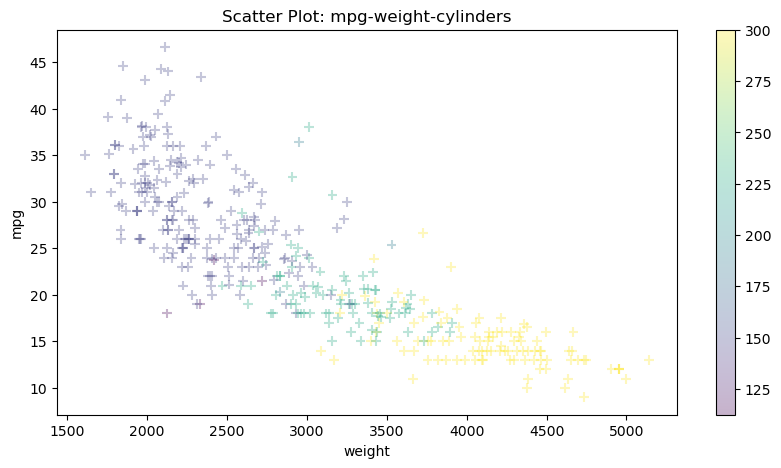

In [41]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig("./scatter.png")   #그린 산점도를 저장하는 메소드
plt.savefig("./scatter_transparent.png", transparent=True)  # 옵션을 투가해서 그림배경을 투명하게 지정  

plt.show()